# load necesary libraries

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# This is to plot within the notebook

In [33]:
%matplotlib inline

# There are three files, train.csv, test.csv, and sample_submission.csv for this competition

##  First load these three files into pandas

In [34]:
df_train = pd.read_csv("train.csv")

In [35]:
df_test = pd.read_csv('test.csv')

In [36]:
df_submission = pd.read_csv('sample_submission.csv')

# Check the dataframe with .head() and .shape

In [37]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_train.shape

(42000, 785)

In [39]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_test.shape

(28000, 784)

In [41]:
df_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [42]:
df_submission.shape

(28000, 2)

# This part is optional, but visualizng the first row of data.

In [43]:
x = df_train.loc[0]

In [44]:
x = x[1:].reshape(28,28)

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


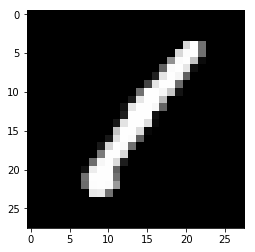

In [45]:
plt.imshow(x, cmap='Greys_r')

#  Remove the lavel colum form the train data.  This will be used as a label.

In [46]:
y_train = df_train.pop('label')

In [47]:
x_train = df_train

# Use the scikit-learn library for machine learning.

## This example uses Random Forest Classifier, but you can try many other algorithms.  

In [48]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [49]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.96323809523809523

# Use this trained model to predict the test data.

In [50]:
results = clf.predict(df_test)

In [51]:
results

array([2, 0, 9, ..., 3, 9, 2])

# Write this result in the submission file

In [56]:
df_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [57]:
df_submission['Label'] = results

In [58]:
df_submission.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


# Save file as a csv file

In [60]:
df_submission.to_csv('submission_file.csv', index = False)